In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

from sklearn.tree import export_graphviz
import graphviz

# Decision Tree for Classification

In [ ]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.937


# Analyzing decision trees

Accuracy on training set: 1.000
Accuracy on test set: 0.937


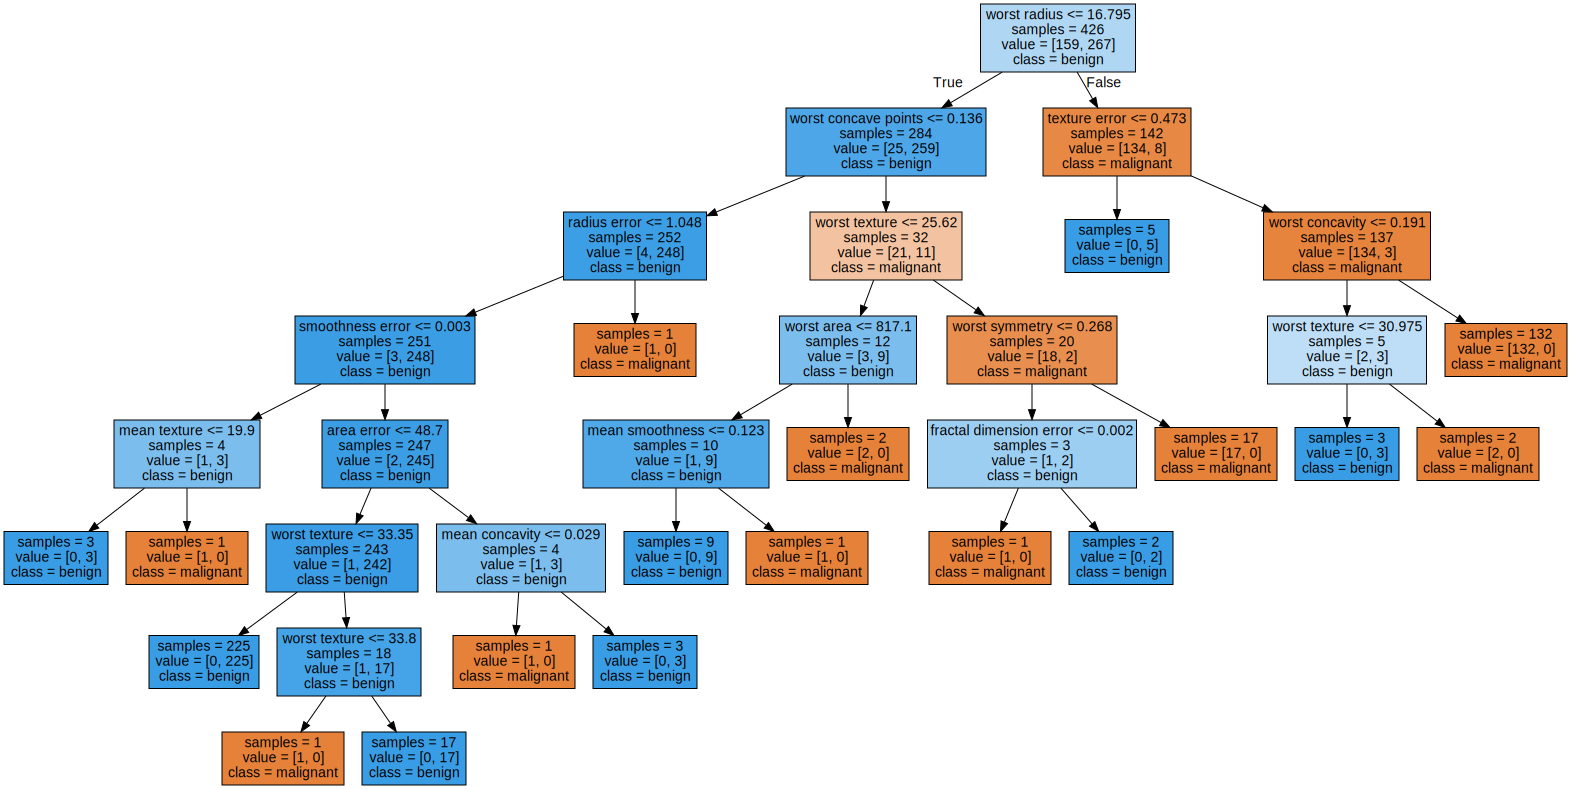

In [ ]:
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

export_graphviz(tree, out_file="tree.dot", class_names=["malignant", "benign"],
                feature_names=cancer.feature_names, impurity=False, filled=True)

with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [ ]:

export_graphviz(
tree,
out_file="bc_tree.dot",
feature_names=cancer.feature_names,
class_names=cancer.target_names,
rounded=True,
filled=True
)

In [ ]:
!dot -Tpng /content/bc_tree.dot -o /content/bc_tree.png

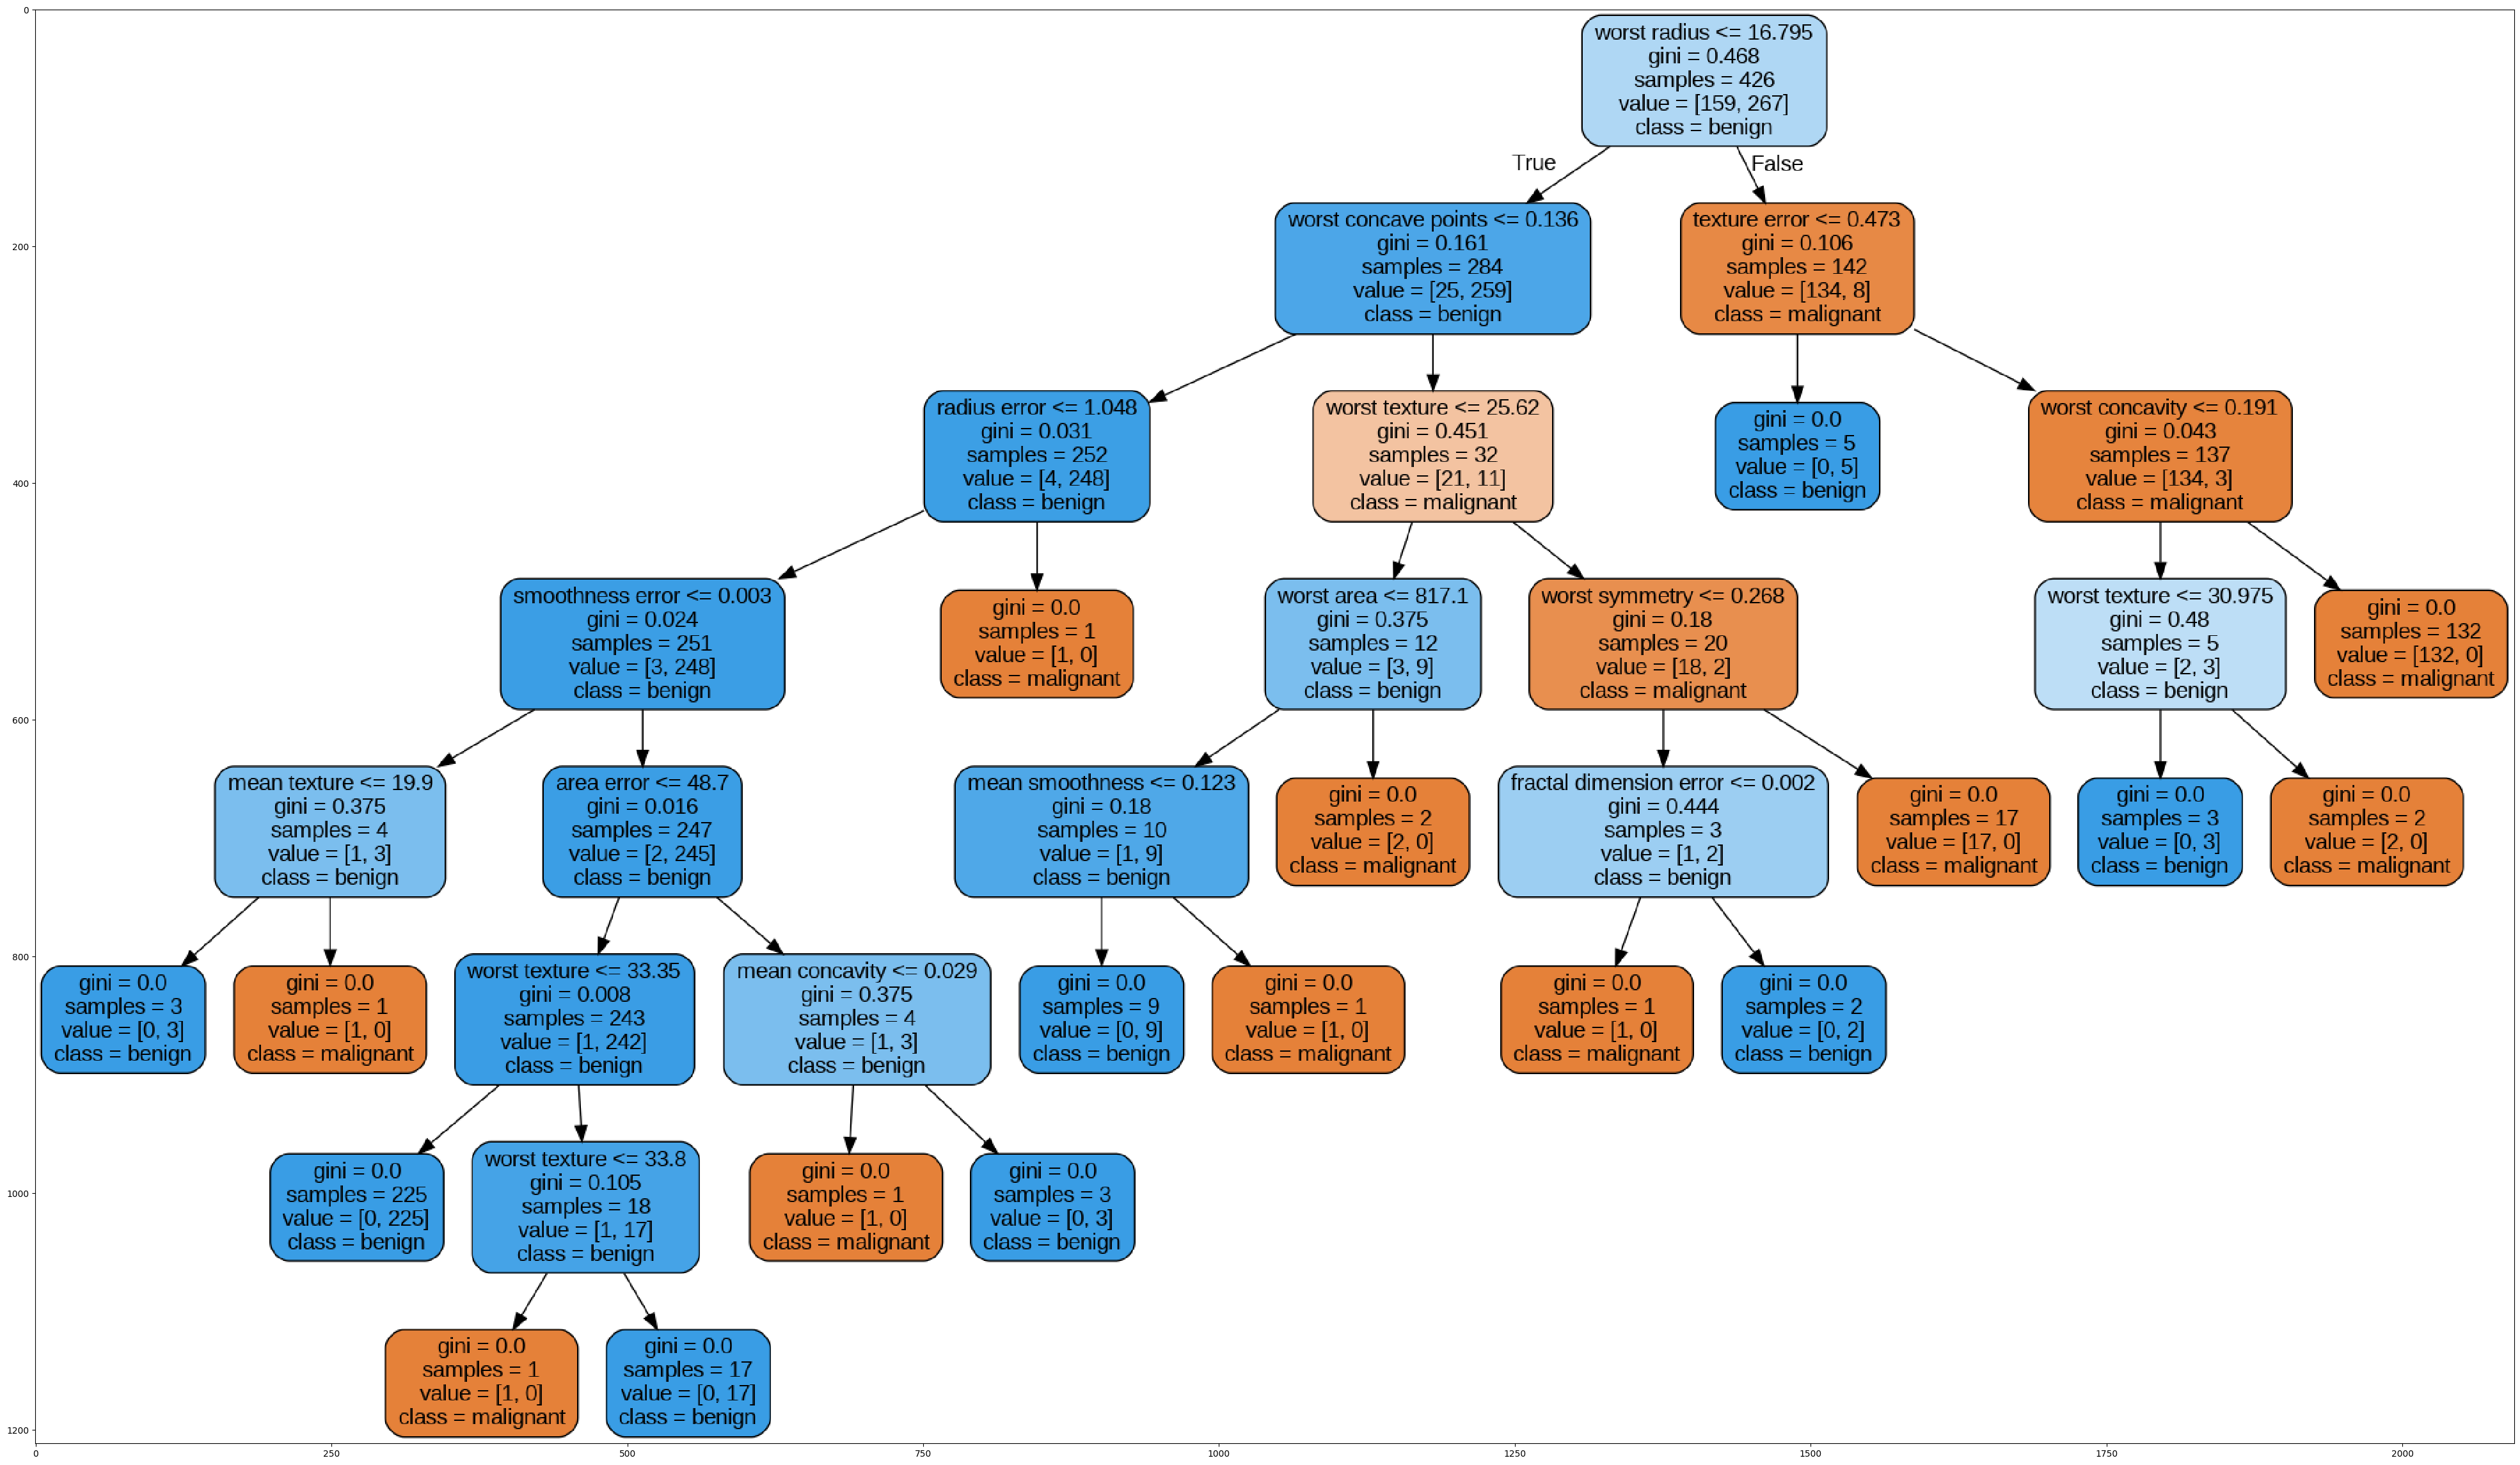

In [ ]:
tree_viz = plt.imread('/content/bc_tree.png')

plt.figure(figsize = (50,50))
plt.imshow(tree_viz, interpolation='nearest')
plt.show()

# Feature importance in trees

In [ ]:
print("Feature importances:\n{}".format(tree.feature_importances_))

Feature importances:
[0.         0.00752597 0.         0.         0.00903116 0.
 0.00752597 0.         0.         0.         0.00975731 0.04630969
 0.         0.00238745 0.00231135 0.         0.         0.
 0.         0.00668975 0.69546322 0.05383211 0.         0.01354675
 0.         0.         0.01740312 0.11684357 0.01137258 0.        ]


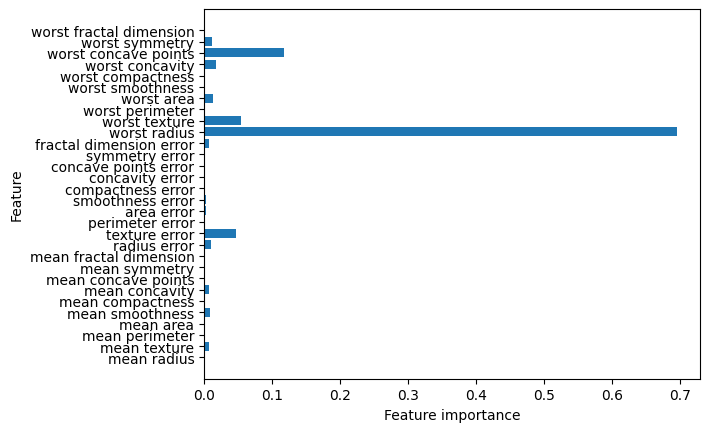

In [ ]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
plot_feature_importances_cancer(tree)

In [ ]:
np.sum(tree.feature_importances_)

1.0000000000000002

# Decision Tree for Regression

In [ ]:
features = [[10],[20],[30],[40],[50],[60],[70],[80]]
targets = [7,5,7,1,2,1,5,4]

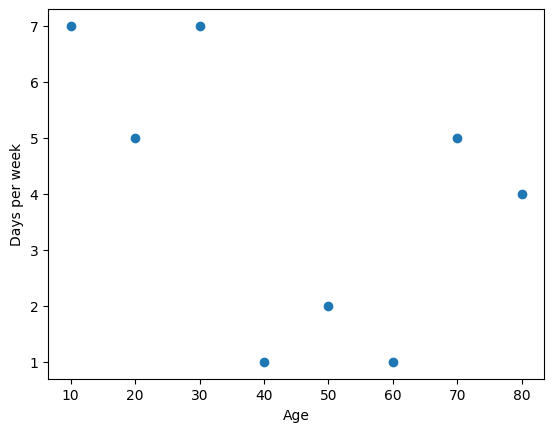

In [ ]:
plt.scatter(features, targets)
plt.xlabel("Age")
plt.ylabel("Days per week")
plt.show()

In [ ]:
dt_regressor = DecisionTreeRegressor(max_depth=2)
dt_regressor.fit(features, targets)

DecisionTreeRegressor(max_depth=2)

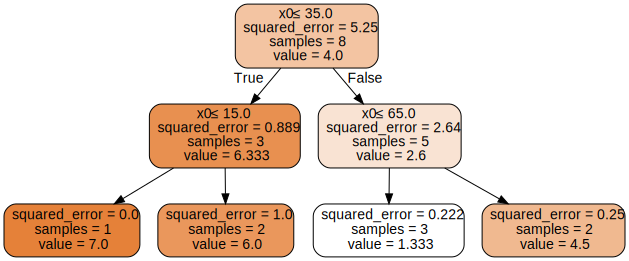

In [ ]:
export_graphviz(dt_regressor, out_file="dt_regressor.dot", filled=True, rounded=True,
                    special_characters=True)

with open("dt_regressor.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

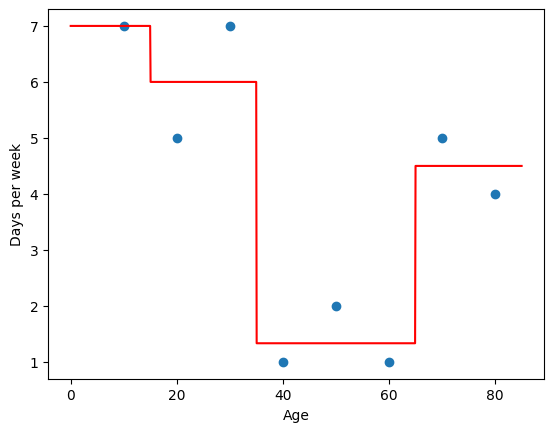

In [ ]:
x = np.linspace(0,85,1000)
plt.scatter(features, targets)
plt.plot(x, dt_regressor.predict(x.reshape([-1,1])),'r-')
plt.xlabel("Age")
plt.ylabel("Days per week")
plt.show()

# RAM Price Dataset
Historical memory (RAM) prices
* x axis: date

* y axis: price of one megabyte of RAM

In [ ]:
import pandas as pd
ram_prices = pd.read_csv("/content/drive/MyDrive/Curso aprendizaje automatico/Semana 7/Clase 1/ram_price.csv")
ram_prices.head()

,Unnamed: 0,date,price
0,0,1957.0,411041792.0
1,1,1959.0,67947725.0
2,2,1960.0,5242880.0
3,3,1965.0,2642412.0
4,4,1970.0,734003.0


Text(0, 0.5, 'Price in $/Mbyte')

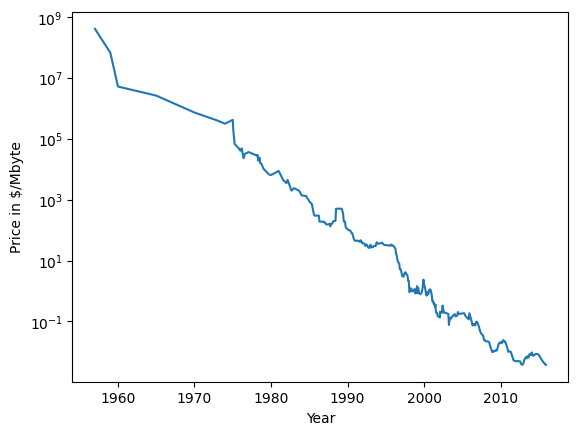

In [ ]:
plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("Year")
plt.ylabel("Price in $/Mbyte")

In [ ]:
# Filtrar los datos de entrenamiento y prueba
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

# Preprocesar las fechas para entrenamiento
X_train = data_train.date.to_numpy()[:, np.newaxis]

In [ ]:
# we use a log-transform to get a simpler relationship of data to target
y_train = np.log(data_train.price)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

# Ajuste del modelo de árbol de decisión
tree = DecisionTreeRegressor().fit(X_train, y_train)

# Ajuste del modelo de regresión lineal
linear_reg = LinearRegression().fit(X_train, y_train)

# Predecir sobre todos los datos
X_all = ram_prices.date.to_numpy()[:, np.newaxis]  # Convertir a numpy array y agregar nueva dimensión
pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

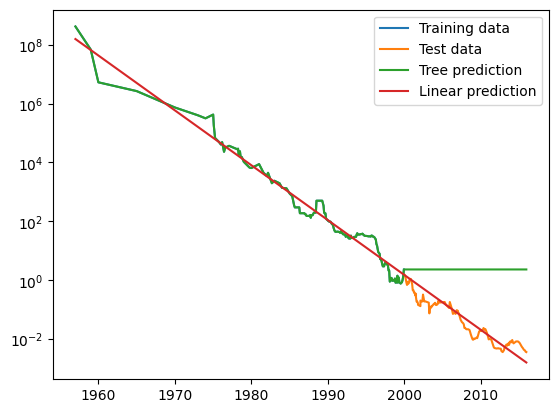

In [ ]:
# undo log-transform
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)
plt.semilogy(data_train.date, data_train.price, label="Training data")
plt.semilogy(data_test.date, data_test.price, label="Test data")
plt.semilogy(ram_prices.date, price_tree, label="Tree prediction")
plt.semilogy(ram_prices.date, price_lr, label="Linear prediction")
plt.legend()

# Random Forest

In [ ]:
emails = np.array([
    [7,8,1],
    [3,2,0],
    [8,4,1],
    [2,6,0],
    [6,5,1],
    [9,6,1],
    [8,5,0],
    [7,1,0],
    [1,9,1],
    [4,7,0],
    [1,3,0],
    [3,10,1],
    [2,2,1],
    [9,3,0],
    [5,3,0],
    [10,1,0],
    [5,9,1],
    [10,8,1],
])
spam_dataset = pd.DataFrame(data=emails, columns=["Lottery", "Sale", "Spam"])
spam_dataset

,Lottery,Sale,Spam
0,7,8,1
1,3,2,0
2,8,4,1
3,2,6,0
4,6,5,1
5,9,6,1
6,8,5,0
7,7,1,0
8,1,9,1
9,4,7,0


In [ ]:
features = spam_dataset[['Lottery', 'Sale']]
labels = spam_dataset['Spam']

In [ ]:
decision_tree_classifier = DecisionTreeClassifier(random_state=0)
decision_tree_classifier.fit(features, labels)
decision_tree_classifier.score(features, labels)

1.0

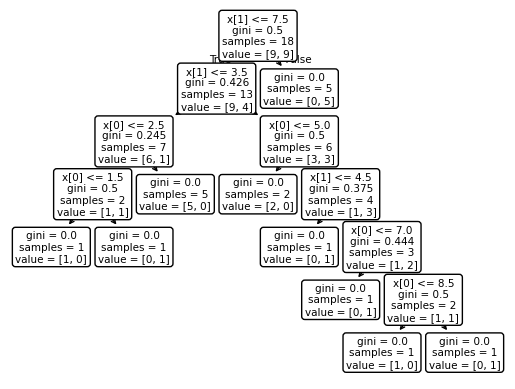

<Figure size 12000x12000 with 0 Axes>

In [ ]:
from sklearn import tree
tree.plot_tree(decision_tree_classifier, rounded=True)
plt.figure(figsize=(20,20),dpi=600)
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
random_forest_classifier = RandomForestClassifier(random_state=0, n_estimators=5, max_depth=1)
random_forest_classifier.fit(features, labels)
random_forest_classifier.score(features, labels)

0.8333333333333334

****************************** Estimator ******************************


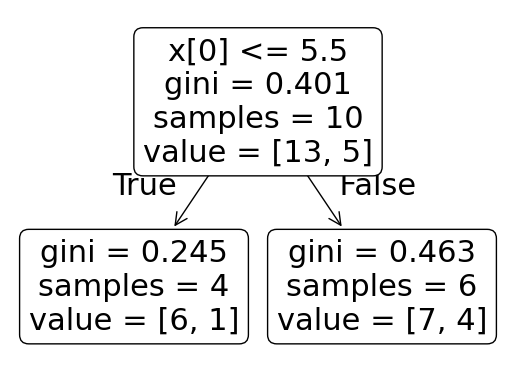

****************************** Estimator ******************************


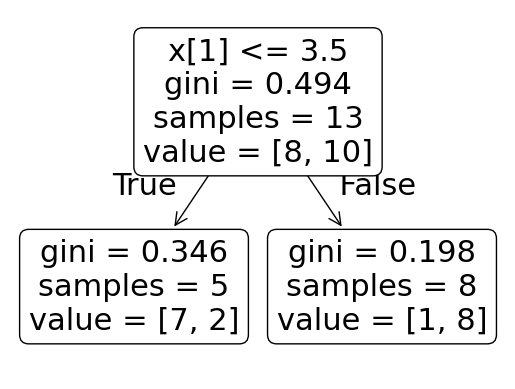

****************************** Estimator ******************************


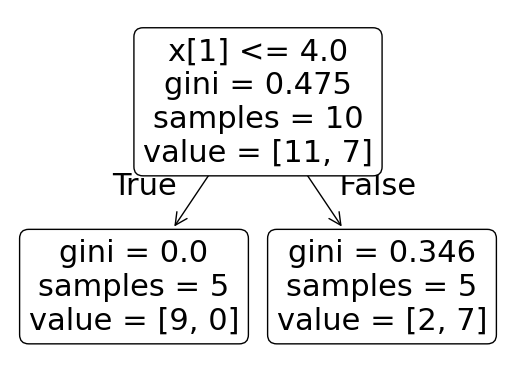

****************************** Estimator ******************************


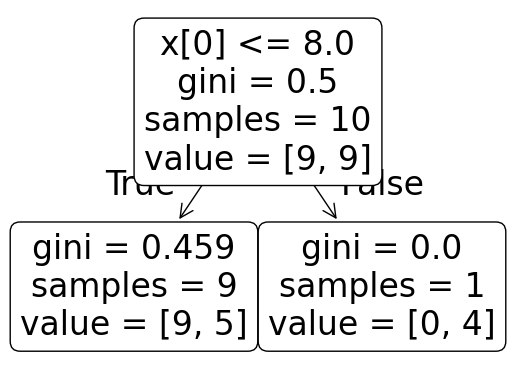

****************************** Estimator ******************************


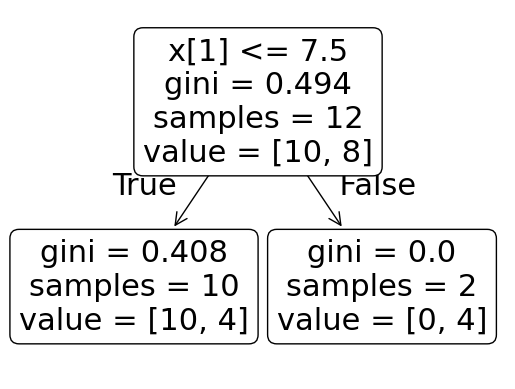

In [ ]:
for dt in random_forest_classifier.estimators_:
    print("*"*30, "Estimator", "*"*30)
    tree.plot_tree(dt, rounded=True)
    plt.show()

In [ ]:
#from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt

In [ ]:
#plot_confusion_matrix(decision_tree_classifier,features,labels)
ConfusionMatrixDisplay(decision_tree_classifier,features,labels)
plt.show()


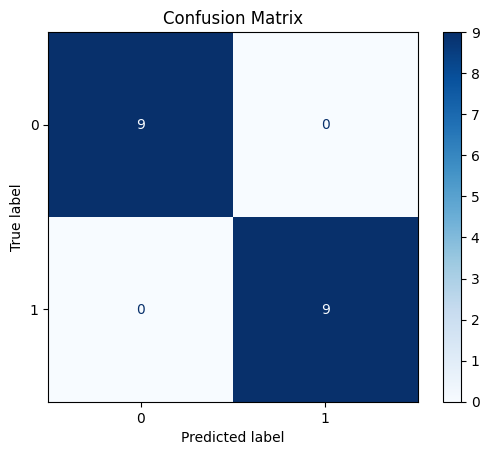

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Realiza predicciones
y_pred = decision_tree_classifier.predict(features)

# Genera la matriz de confusión
conf_matrix = confusion_matrix(labels, y_pred)

# Visualiza la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=decision_tree_classifier.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

In [ ]:
tree_pred = decision_tree_classifier.predict(features)
print(classification_report(labels, tree_pred, target_names=['spam','ham']))

              precision    recall  f1-score   support

        spam       1.00      1.00      1.00         9
         ham       1.00      1.00      1.00         9

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18



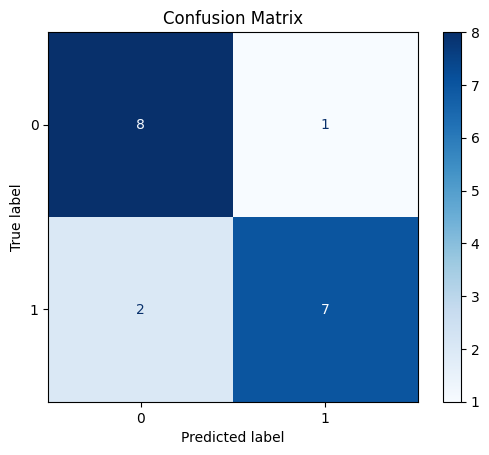

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Realiza predicciones
y_pred = random_forest_classifier.predict(features)

# Genera la matriz de confusión
conf_matrix = confusion_matrix(labels, y_pred)

# Visualiza la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=decision_tree_classifier.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

In [ ]:
RF_pred = random_forest_classifier.predict(features)
print(classification_report(labels, RF_pred, target_names=['spam','ham']))

              precision    recall  f1-score   support

        spam       0.80      0.89      0.84         9
         ham       0.88      0.78      0.82         9

    accuracy                           0.83        18
   macro avg       0.84      0.83      0.83        18
weighted avg       0.84      0.83      0.83        18



In [ ]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.8/165.8 kB 10.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 31.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 63.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 23.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 70.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 92.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 78.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 65.9 MB/s eta 0:00:00
   ━━━━